# Exercice 3.6

In [1]:
import numpy as np
import time
import random
import string
from typing import List, Tuple
import matplotlib.pyplot as plt

#Compute the Levenshtein distance between two strings using dynamic programming.

def edit_distance(str1, str2):
    # Create a matrix of size (m+1) x (n+1) where m and n are lengths of strings
    m, n = len(str1), len(str2)
    matrix = np.zeros((m + 1, n + 1), dtype=int)
    
    # Initialize first row and column
    for i in range(m + 1):
        matrix[i][0] = i
    for j in range(n + 1):
        matrix[0][j] = j
        
    # Fill the matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i-1] == str2[j-1]:
                matrix[i][j] = matrix[i-1][j-1]
            else:
                matrix[i][j] = 1 + min(
                    matrix[i-1][j],   
                    matrix[i][j-1],    
                    matrix[i-1][j-1]   
                )
    
    return matrix[m][n]

In [2]:
#Generate random words of specified length

def generate_random_word(length):
    return ''.join(random.choices(string.ascii_lowercase, k=length))


In [3]:
#Measure average computation time for edit distance between pairs of words of length n

def measure_performance(n, num_samples = 100000):

    total_time = 0
    
    # Generate word of legnth n
    words1 = [generate_random_word(n) for _ in range(num_samples)]
    words2 = [generate_random_word(n) for _ in range(num_samples)]
    
    # Measure computation time
    start_time = time.time()
    for w1, w2 in zip(words1, words2):
        edit_distance(w1, w2)
    total_time = time.time() - start_time
    
    return total_time / num_samples

In [4]:
#Function to analyze the random time complexity 

def analyze_complexity(max_length = 20, samples_per_length = 100000):

    lengths = range(1, max_length + 1)
    times = []
    
    for n in lengths:
        avg_time = measure_performance(n, samples_per_length)
        times.append(avg_time)
        print(f"Length {n}: {avg_time:.6f} seconds per computation")
    
    return list(lengths), times

Length 1: 0.000013 seconds per computation
Length 2: 0.000015 seconds per computation
Length 3: 0.000025 seconds per computation
Length 4: 0.000069 seconds per computation
Length 5: 0.000148 seconds per computation
Length 6: 0.000114 seconds per computation
Length 7: 0.000182 seconds per computation
Length 8: 0.000177 seconds per computation
Length 9: 0.000207 seconds per computation
Length 10: 0.000277 seconds per computation
Length 11: 0.000277 seconds per computation
Length 12: 0.000364 seconds per computation
Length 13: 0.000397 seconds per computation
Length 14: 0.000409 seconds per computation
Length 15: 0.000853 seconds per computation
Length 16: 0.001334 seconds per computation
Length 17: 0.001518 seconds per computation
Length 18: 0.001377 seconds per computation
Length 19: 0.001345 seconds per computation
Length 20: 0.000657 seconds per computation
Length 21: 0.000856 seconds per computation
Length 22: 0.000883 seconds per computation
Length 23: 0.000933 seconds per computati

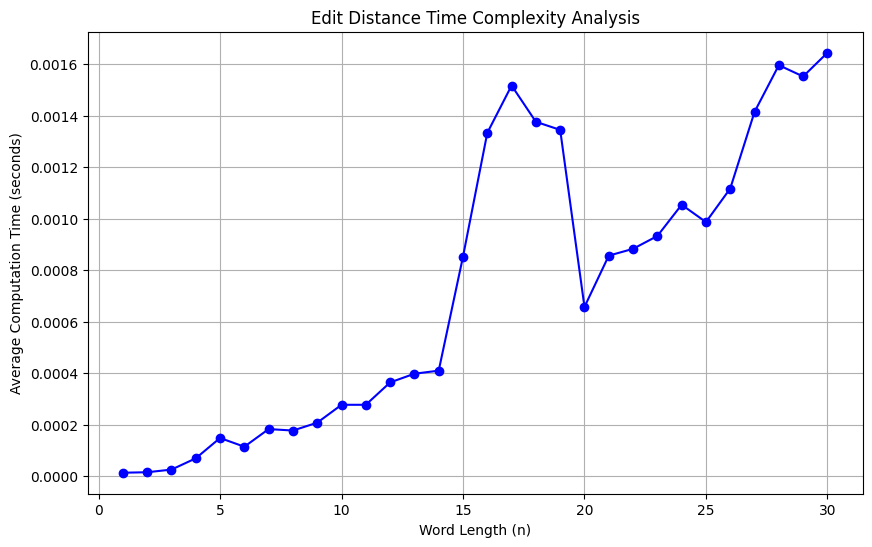

In [5]:
# Running the analysis and plotting the results

lengths, times = analyze_complexity(30, 100000)

plt.figure(figsize=(10, 6))
plt.plot(lengths, times, 'bo-')
plt.xlabel('Word Length (n)')
plt.ylabel('Average Computation Time (seconds)')
plt.title('Edit Distance Time Complexity Analysis')
plt.grid(True)



Given the plot's growth, a reasonable estimation would be that the complexity is 𝑂(𝑛2) with n being the length of the word and with computation time increasing as the word length grows quadratically.